In [153]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings as w
w.filterwarnings('ignore')

In [173]:
# What analysis can be done for the data
#1) Number of times the teams won the FIA championship ✅
#2) The biggest rivalry between champions & Teams ✅
#3) The Nationality of Drivers ✅
#4) Which driver sets the fastest lap in which circuit and holds the record ✅
#5) Fastest pitstops for the team every year ✅
#6) Maximum number of points earned by the drivers and the teams ✅
#7) Which track takes the most time and which track takes the shortest time ✅
#8) Which drivers could convert pole position to a race win ✅

# 1) Number of times the teams won the FIA Championship

In [155]:
df1 = pd.read_csv('F1_Dataset/circuits.csv')
df1.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [156]:
df1.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683,247.012987
std,23.001701,22.808866,65.516951,362.738469
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,18.000000
50%,40.000000,40.951700,3.930830,129.000000
75%,59.000000,46.958900,19.248600,332.000000
max,80.000000,57.265300,144.968000,2227.000000


In [157]:
circuit_counts = df1['name'].value_counts()
print(circuit_counts)

name
Albert Park Grand Prix Circuit    1
Nivelles-Baulers                  1
Zeltweg                           1
Prince George Circuit             1
Reims-Gueux                       1
                                 ..
Circuito de Jerez                 1
Autódromo Juan y Oscar Gálvez     1
Yas Marina Circuit                1
Las Vegas Strip Street Circuit    1
Miami International Autodrome     1
Name: count, Length: 77, dtype: int64


In [158]:
df2 = pd.read_csv('F1_dataset/constructors.csv')
df2

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [159]:
df2_new = df2.drop('url',axis=1)
df2_new.head(5)

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [160]:
df3 = pd.read_csv('F1_dataset/constructor_standings.csv')
df3

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13266,28848,1132,15,0.0,10,10,0
13267,28849,1132,210,27.0,7,7,0
13268,28850,1132,215,31.0,6,6,0
13269,28851,1132,3,4.0,9,9,0


In [161]:
df3.isnull().sum()

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

In [171]:
# Filter out the team that won the FIA constructors championship
championship_winners = df3[df3['position'] == 1]

# Count the championships per team (constructorId)
team_wins = championship_winners['constructorId'].value_counts().reset_index()
team_wins.columns = ['constructorId', 'championship_wins']

# Left join with constructors to get the name of the winning teams
team_wins = team_wins.merge(df2, on='constructorId', how='left')

# Sorting the results
team_wins = team_wins.sort_values(by='championship_wins', ascending=False)

# Display results
print("Number of FIA Championships Won by Teams:")
print(team_wins[['name', 'championship_wins']])

Number of FIA Championships Won by Teams:
               name  championship_wins
0           Ferrari                234
1           McLaren                165
2          Mercedes                145
3          Red Bull                120
4          Williams                114
5           Renault                 46
6        Team Lotus                 44
7          Benetton                 29
8      Lotus-Climax                 23
9     Cooper-Climax                 20
10            Brawn                 17
12          Tyrrell                 16
11    Brabham-Repco                 16
13              BRM                 14
14       Lotus-Ford                 12
15       Matra-Ford                 11
16          Brabham                  6
17           Ligier                  4
18           Cooper                  4
19          Vanwall                  3
20            March                  3
21  Cooper-Maserati                  1
22       BMW Sauber                  1
23             Wolf   

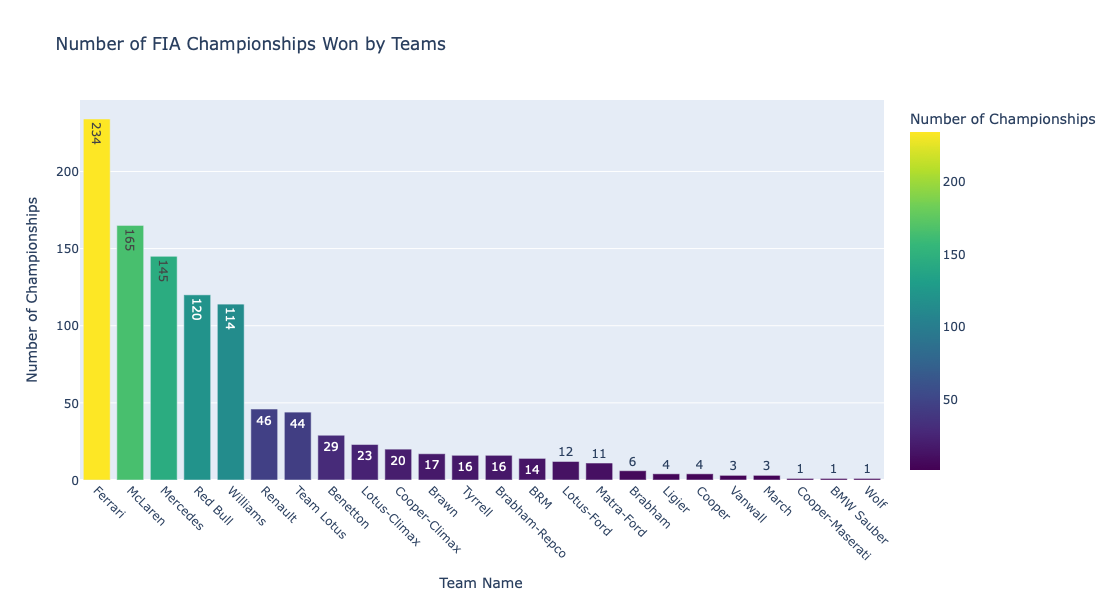

In [172]:
fig = px.bar(
    team_wins,
    x='name',
    y='championship_wins',
    title='Number of FIA Championships Won by Teams',
    labels={'name': 'Team Name', 'championship_wins': 'Number of Championships'},
    text='championship_wins',  # Add numbers on top of the bars
    color='championship_wins',
    color_continuous_scale='viridis'
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(title="Team Name", tickangle=45),
    yaxis=dict(title="Number of Championships"),
    template="plotly",
    height=600
)

fig.show()

# 2)The biggest rivalry between champions & Teams

In [164]:
constructor_standings = pd.read_csv('F1_dataset/constructor_standings.csv')  # Constructor standings
constructors = pd.read_csv('F1_dataset/constructors.csv')  # Constructor details
races = pd.read_csv('F1_dataset/races_cleaned_1.csv')  # Race details

# Check columns before merging
print("Constructor Standings Columns:", constructor_standings.columns)
print("Constructors Columns:", constructors.columns)
print("Races Columns:", races.columns)

# Merge datasets to create a comprehensive `constructor_position` DataFrame
constructor_position = constructor_standings.merge(constructors.rename(columns={'name': 'constructor_name'}), on='constructorId',how='left'
).merge(races.rename(columns={'name': 'race_name'}),on='raceId',how='left')
print("Constructor Position Columns:", constructor_position.columns)
constructor_position.columns = map(str.lower, constructor_position.columns)
constructor_position['year'] = pd.to_datetime(constructor_position['date']).dt.year

Constructor Standings Columns: Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')
Constructors Columns: Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')
Races Columns: Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time'],
      dtype='object')
Constructor Position Columns: Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'constructorRef',
       'constructor_name', 'nationality', 'url_x', 'year', 'round',
       'circuitId', 'race_name', 'date', 'time', 'url_y', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time'],
      dtype='object')


Moderate Constructor Rivalry!
----------------------------------


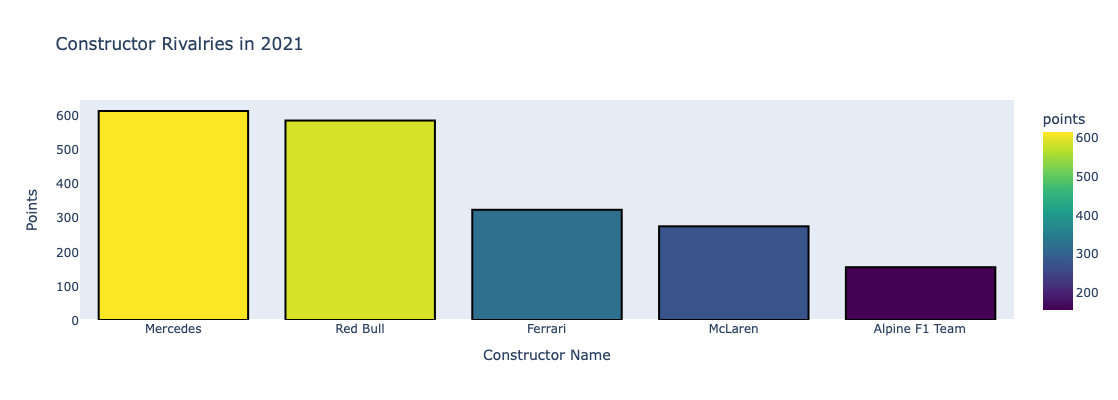

In [165]:
# Constructor Rivalry Analysis Function
def constructor_rivalry_analysis(year, constructor_position):
    """
    Analyze the biggest constructor rivalry in a given year and visualize the results.

    Parameters:
        year (int): The year to analyze.
        constructor_position (DataFrame): Comprehensive DataFrame with constructor standings and race data.
    """
    # Step 1: Filter for the given year and get top 5 constructors based on points
    constructor_competition = constructor_position[constructor_position['year'] == year] \
        .groupby(['constructor_name', 'year'])['points'].max() \
        .sort_values(ascending=False).reset_index().head(5)

    # Rivalry Intensity
    if constructor_competition.iloc[0, 2] - constructor_competition.iloc[1, 2] <= 10:
        print('\033[1m' + 'BIGGEST CONSTRUCTOR RIVALRY IN THE MAKING!')
    elif constructor_competition.iloc[0, 2] - constructor_competition.iloc[1, 2] <= 20:
        print('\033[1m' + 'Spicy Constructor Rivalry!')
    elif constructor_competition.iloc[0, 2] - constructor_competition.iloc[1, 2] < 30:
        print('\033[1m' + 'Moderate Constructor Rivalry!')
    else:
        print('\033[1m' + 'Dominant Constructor Lead - Less Competition')

    # Step 2: Prepare visualization data for top 5 constructors
    constructor_top_five = constructor_position[constructor_position['year'] == year] \
        .groupby(['constructor_name'])[['points', 'wins']].max() \
        .sort_values('points', ascending=False).head(5).reset_index()

    # Step 3: Create the bar plot for visualization
    fig = px.bar(
        constructor_top_five,
        x='constructor_name',
        y='points',
        hover_data=['wins'],
        color='points',
        height=400,
        color_continuous_scale='viridis',
        title=f"Constructor Rivalries in {year}"
    )

    fig.update_layout(
        xaxis=dict(title="Constructor Name", showgrid=False),
        yaxis=dict(title="Points", showgrid=False),
        template="plotly"
    )

    fig.update_traces(
        textfont_size=20,
        marker=dict(line=dict(color='#000000', width=2))
    )

    print('----------------------------------')
    fig.show()

# Example usage
constructor_rivalry_analysis(2021, constructor_position)  # Analyze constructor rivalry for 2021

In [167]:
driver_standings = pd.read_csv('F1_dataset/driver_standings.csv')  # Driver standings
drivers = pd.read_csv('F1_dataset/drivers.csv')  # Driver details
results = pd.read_csv('F1_dataset/results.csv')  # Race results
circuits = pd.read_csv('F1_dataset/circuits.csv')  # Circuit details
races = pd.read_csv('F1_dataset/races_cleaned_1.csv')  # Race details

# Merge datasets to create a comprehensive `driver_position` DataFrame
driver_position = driver_standings.merge(
    drivers, left_on='driverId', right_on='driverId', how='left'
).merge(
    results, on=['raceId', 'driverId'], how='left'
).merge(
    races, on='raceId', how='left'
).merge(
    circuits, left_on='circuitId', right_on='circuitId', how='left'
)

# Ensure all columns are lowercase for consistency
driver_position.columns = map(str.lower, driver_position.columns)

# Convert dates and relevant fields
driver_position['year'] = pd.to_datetime(driver_position['date']).dt.year
driver_position['date'] = pd.to_datetime(driver_position['date'])

# Ensure the 'points' column exists
if 'points' not in driver_position.columns:
    driver_position['points'] = driver_position['points_x']  # Use points from driver_standings or results if necessary

BIGGEST RIVALRY IN THE MAKING!
----------------------------------


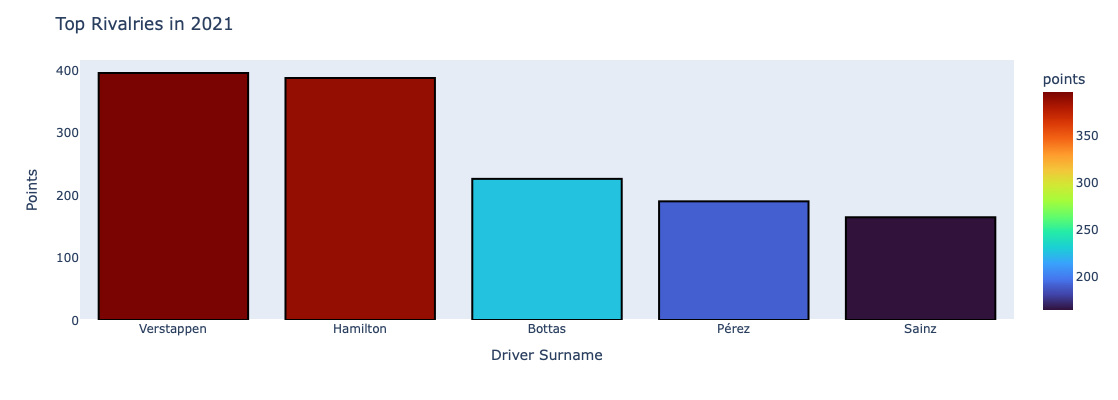

In [168]:
def rivalry_analysis(year, driver_position):
    """
    Analyze the biggest rivalry in a given year and visualize the results.

    Parameters:
        year (int): The year to analyze.
        driver_position (DataFrame): Comprehensive DataFrame with driver standings, results, and circuit data.
    """
    # Step 1: Filter for the given year and get top 5 drivers based on points
    competition = driver_position[driver_position['year'] == year] \
        .groupby(['surname', 'year'])['points'].max() \
        .sort_values(ascending=False).reset_index().head(5)

    # Check for rivalry intensity
    if competition.iloc[0, 2] - competition.iloc[1, 2] <= 10:
        print('\033[1m' + 'BIGGEST RIVALRY IN THE MAKING!')
    elif competition.iloc[0, 2] - competition.iloc[1, 2] <= 20:
        print('\033[1m' + 'Spicy Rivalry!')
    elif competition.iloc[0, 2] - competition.iloc[1, 2] < 30:
        print('\033[1m' + 'Moderate Rivalry!')
    else:
        print('\033[1m' + 'Dominant Lead - Less Competition')

    # Step 2: Prepare visualization data for top 5 drivers
    top_five = driver_position[driver_position['year'] == year] \
        .groupby(['surname'])[['points', 'wins']].max() \
        .sort_values('points', ascending=False).head(5).reset_index()

    # Step 3: Create the bar plot for visualization
    fig = px.bar(
        top_five,
        x='surname',
        y='points',
        hover_data=['wins'],
        color='points',
        height=400,
        color_continuous_scale='turbo'
    )

    fig.update_layout(
        title=f"Top Rivalries in {year}",
        xaxis=dict(title="Driver Surname", showgrid=False),
        yaxis=dict(title="Points", showgrid=False),
        template="plotly"
    )

    fig.update_traces(
        textfont_size=20,
        marker=dict(line=dict(color='#000000', width=2))
    )

    print('----------------------------------')
    fig.show()

# Example usage of the rivalry analysis function
rivalry_analysis(2021, driver_position)

# 3) The Nationality of Drivers

In [102]:
# Now let's plot the nationality of the drivers, according which driver is oldest on the grid
# Convert 'dob' to datetime and calculate age
df5_new['dob'] = pd.to_datetime(df5_new['dob'], errors='coerce')
today = pd.Timestamp.now()
df5_new['age'] = df5_new['dob'].apply(lambda x: (today - x).days // 365 if pd.notnull(x) else None)

# Add age groups
df5_new['Age Group'] = pd.cut(
    df5_new['age'],
    bins=[0, 25, 35, 50, 100],
    labels=['<25', '25-35', '35-50', '>50']
)

# Group by nationality and age group
driver_by_nationality_sorted = (
    df5_new.groupby(['nationality', 'Age Group'])['driverId']
    .count()
    .reset_index(name='Number of Drivers')
)

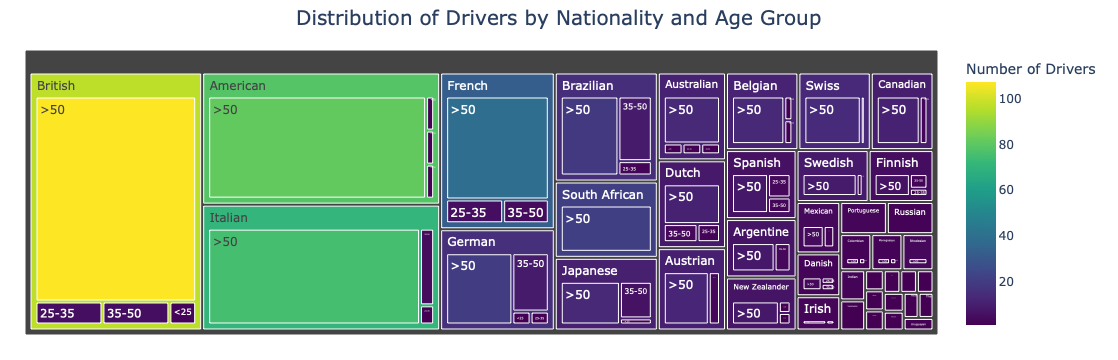

In [104]:
# Ensure no zero or NaN values in 'Number of Drivers'
driver_by_nationality_sorted = driver_by_nationality_sorted[driver_by_nationality_sorted['Number of Drivers'] > 0]

# Create a treemap
fig = px.treemap(
    driver_by_nationality_sorted,
    path=['nationality', 'Age Group'],
    values='Number of Drivers',
    color='Number of Drivers',
    title='Distribution of Drivers by Nationality and Age Group',
    labels={'nationality': 'Nationality', 'Number of Drivers': 'Number of Drivers'},
    color_continuous_scale='Viridis'
)

# Customize layout for better readability
fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    template='plotly',
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the chart
fig.show()

# 4) Which Race occured how many number of times, How the number of races have been evolving since 1950, and which driver sets the fastest lap on which circuit.

In [65]:
df6 = pd.read_csv('F1_dataset/drivers.csv')
df6.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [66]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     859 non-null    int64 
 1   driverRef    859 non-null    object
 2   number       859 non-null    object
 3   code         859 non-null    object
 4   forename     859 non-null    object
 5   surname      859 non-null    object
 6   dob          859 non-null    object
 7   nationality  859 non-null    object
 8   url          859 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.5+ KB


In [67]:
df7 = pd.read_csv('F1_dataset/results.csv')
df7

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [68]:
races_df = pd.read_csv('F1_dataset/races.csv')
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [69]:
# Replace placeholder '\N' with NaN for proper handling
races_df.replace('\\N', np.nan, inplace=True)

# Checking for the missing values
print('Missing Values per Column:')
print(races_df.isnull().sum())

# Now let's drop or imputate the missing values as needed, like droping the columns or rows with excessive missing values
races_df_cleaned = races_df.drop(columns=['sprint_date', 'sprint_time'], axis=1)

# Impute missing 'time' or 'fp1_date' with a placeholder
races_df_cleaned['fp1_date'].fillna('Not Available', inplace=True)
races_df_cleaned['time'].fillna('00:00:00', inplace=True)

# Verifying the cleaned data
print("\nAfter Cleaning:")
print(races_df_cleaned.isnull().sum())

# Save cleaned data for future analysis
races_df_cleaned.to_csv('F1_dataset/races_cleaned.csv', index=False)

Missing Values per Column:
raceId            0
year              0
round             0
circuitId         0
name              0
date              0
time            731
url               0
fp1_date       1035
fp1_time       1057
fp2_date       1035
fp2_time       1057
fp3_date       1053
fp3_time       1072
quali_date     1035
quali_time     1057
sprint_date    1107
sprint_time    1110
dtype: int64

After Cleaning:
raceId           0
year             0
round            0
circuitId        0
name             0
date             0
time             0
url              0
fp1_date         0
fp1_time      1057
fp2_date      1035
fp2_time      1057
fp3_date      1053
fp3_time      1072
quali_date    1035
quali_time    1057
dtype: int64


In [70]:
# Impute missing practice and qualifying data with "Not Available"
races_df_cleaned[['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 
                  'fp3_date', 'fp3_time', 'quali_date', 'quali_time']] = \
races_df_cleaned[['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 
                  'fp3_date', 'fp3_time', 'quali_date', 'quali_time']].fillna('Not Available')

# Check missing values again
print("After Imputation:")
print(races_df_cleaned.isnull().sum())

# Save cleaned data
races_df_cleaned.to_csv('F1_dataset/races_cleaned_1.csv', index=False)

After Imputation:
raceId        0
year          0
round         0
circuitId     0
name          0
date          0
time          0
url           0
fp1_date      0
fp1_time      0
fp2_date      0
fp2_time      0
fp3_date      0
fp3_time      0
quali_date    0
quali_time    0
dtype: int64


In [71]:
data = pd.read_csv('F1_dataset/races_cleaned_1.csv')
data

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,Not Available,Not Available,2024-11-02,18:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,Not Available,Not Available,2024-11-30,17:00:00


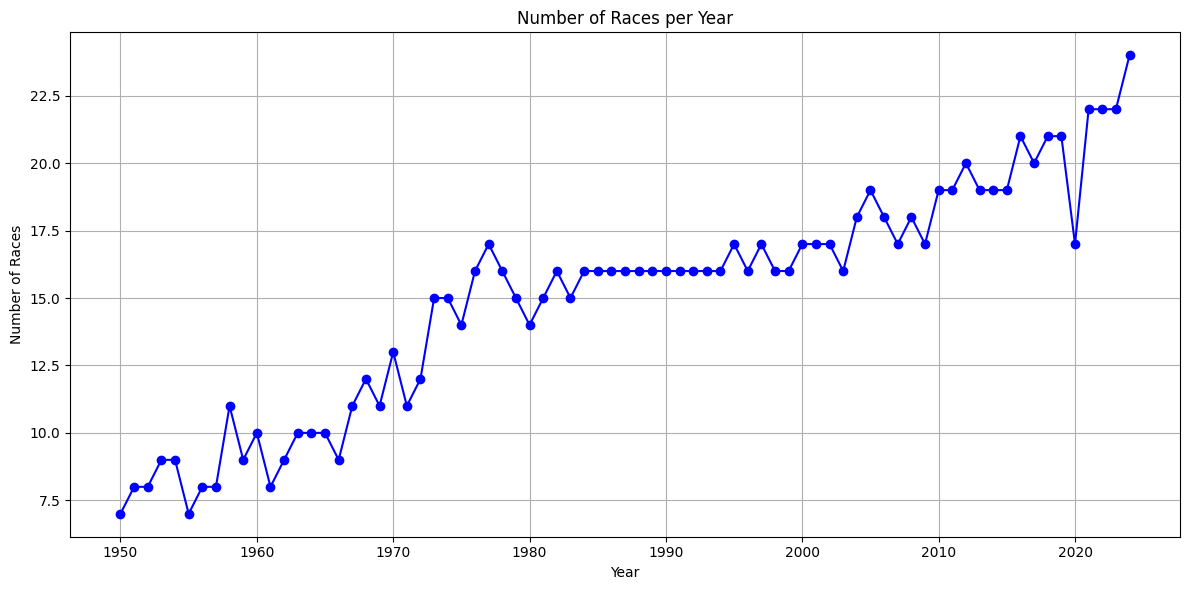

In [72]:
# Load cleaned data
race_df = pd.read_csv('F1_dataset/races_cleaned_1.csv')

# Count number of races per year
races_per_year = race_df['year'].value_counts().sort_index()

# Plot: Races per year
plt.figure(figsize=(12, 6))
plt.plot(races_per_year.index, races_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid()
plt.tight_layout()
plt.show()

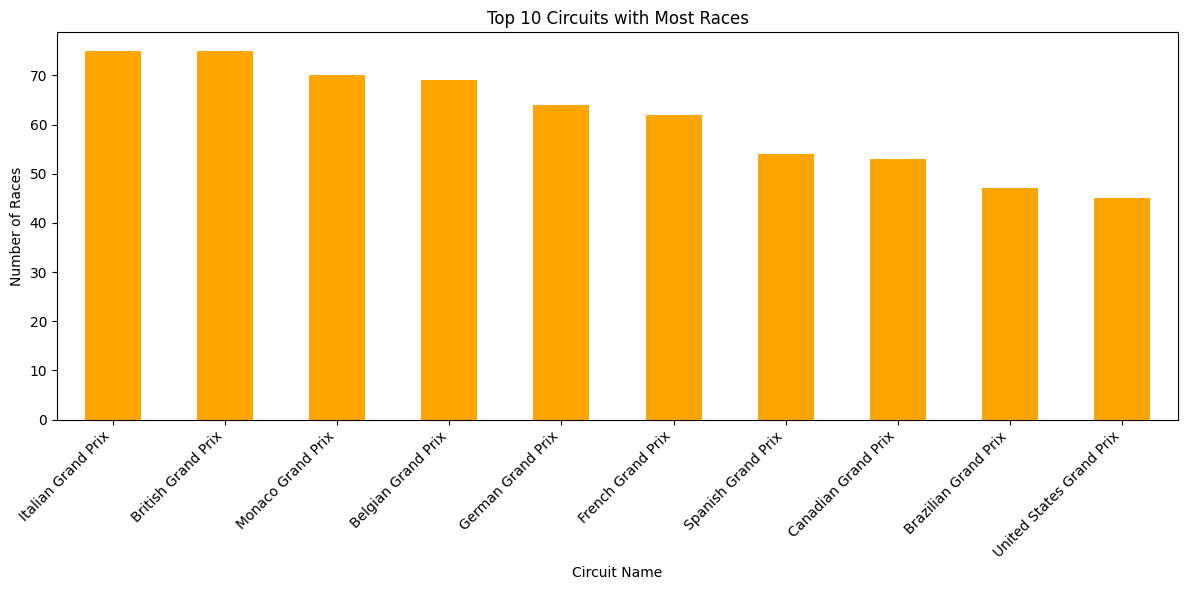

In [73]:
# Count races by circuit
races_by_circuit = race_df['name'].value_counts().head(10)

# Plot: Top 10 circuits with the most races
plt.figure(figsize=(12, 6))
races_by_circuit.plot(kind='bar', color='orange')
plt.title('Top 10 Circuits with Most Races')
plt.xlabel('Circuit Name')
plt.ylabel('Number of Races')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

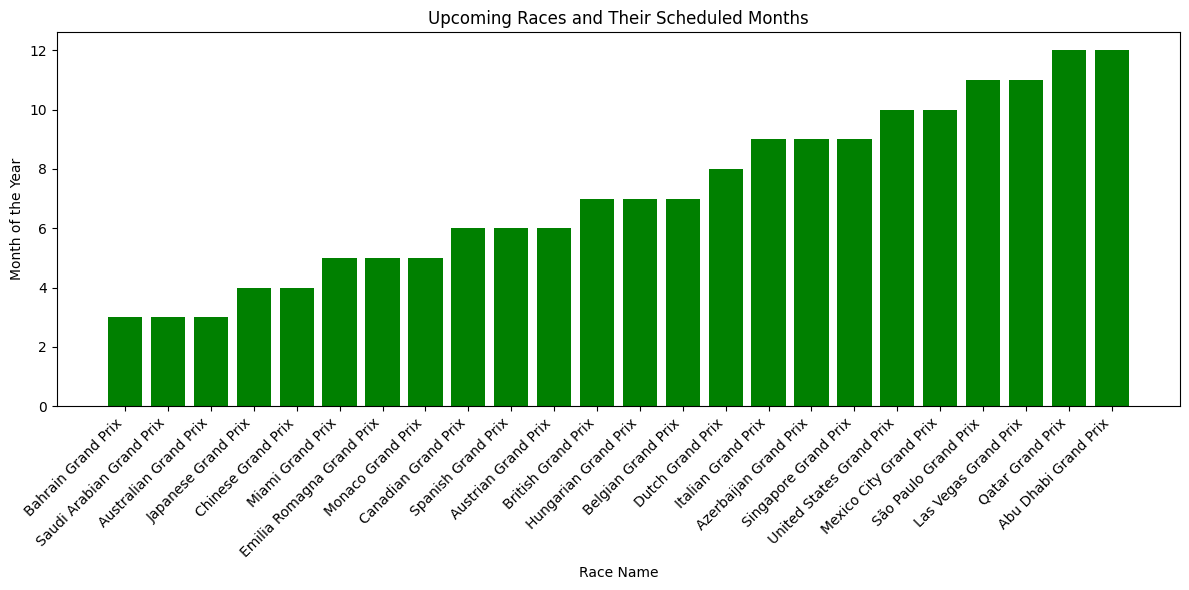

Upcoming Races:
      year                       name        date      time
1101  2024         Bahrain Grand Prix  2024-03-02  15:00:00
1102  2024   Saudi Arabian Grand Prix  2024-03-09  17:00:00
1103  2024      Australian Grand Prix  2024-03-24  04:00:00
1104  2024        Japanese Grand Prix  2024-04-07  05:00:00
1105  2024         Chinese Grand Prix  2024-04-21  07:00:00
1106  2024           Miami Grand Prix  2024-05-05  20:00:00
1107  2024  Emilia Romagna Grand Prix  2024-05-19  13:00:00
1108  2024          Monaco Grand Prix  2024-05-26  13:00:00
1109  2024        Canadian Grand Prix  2024-06-09  18:00:00
1110  2024         Spanish Grand Prix  2024-06-23  13:00:00
1111  2024        Austrian Grand Prix  2024-06-30  13:00:00
1112  2024         British Grand Prix  2024-07-07  14:00:00
1113  2024       Hungarian Grand Prix  2024-07-21  13:00:00
1114  2024         Belgian Grand Prix  2024-07-28  13:00:00
1115  2024           Dutch Grand Prix  2024-08-25  13:00:00
1116  2024         Itali

In [74]:
# Filter for upcoming races
upcoming_races = race_df[race_df['year'] >= 2024]

# Plot upcoming races
plt.figure(figsize=(12, 6))
plt.bar(upcoming_races['name'], pd.to_datetime(upcoming_races['date']).dt.month, color='green')
plt.title('Upcoming Races and Their Scheduled Months')
plt.xlabel('Race Name')
plt.ylabel('Month of the Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display upcoming races
print("Upcoming Races:")
print(upcoming_races[['year', 'name', 'date', 'time']])

In [75]:
drivers_df = pd.read_csv('F1_dataset/drivers.csv')
race_df = pd.read_csv('F1_dataset/races_cleaned_1.csv')
lap_times_df = pd.read_csv('F1_dataset/lap_times.csv')

# Merging lap times with drivers to get the drivers names
lap_time_with_drivers = lap_times_df.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId', how='left')
# Merging with races to get the name of the grand prix or circuits
lap_times_with_races = lap_time_with_drivers.merge(race_df[['raceId', 'name']], on='raceId', how='left')

# Finding the fastest lap for each of the circuit
fastest_lap_per_circuit = lap_times_with_races.loc[lap_times_with_races.groupby('name')['milliseconds'].idxmin()]
fastest_lap_per_circuit['Driver'] = (fastest_lap_per_circuit['forename'] + ' ' + fastest_lap_per_circuit['surname'])

def milliseconds_to_laptime(ms):
    minutes = ms // 60000
    seconds = (ms % 60000) // 1000
    milliseconds = ms % 1000
    return f"{minutes}:{seconds:02}.{milliseconds:03}"

fastest_lap_per_circuit['Lap Time'] = fastest_lap_per_circuit['milliseconds'].apply(milliseconds_to_laptime)

# Display the results
print('Fastest lap records by circuits')
print(fastest_lap_per_circuit[['name','Driver','Lap Time', 'milliseconds']])

Fastest lap records by circuits
                               name                 Driver  Lap Time  \
477186  70th Anniversary Grand Prix         Lewis Hamilton  1:28.451   
513690         Abu Dhabi Grand Prix         Max Verstappen  1:26.103   
130730         Argentine Grand Prix         Gerhard Berger  1:27.981   
564710        Australian Grand Prix        Charles Leclerc  1:19.813   
500311          Austrian Grand Prix         Max Verstappen  1:06.200   
452514        Azerbaijan Grand Prix        Charles Leclerc  1:43.009   
248125           Bahrain Grand Prix     Michael Schumacher  1:30.252   
260255           Belgian Grand Prix         Kimi Räikkönen  1:45.108   
446758         Brazilian Grand Prix        Valtteri Bottas  1:10.540   
256556           British Grand Prix     Michael Schumacher  1:18.739   
456239          Canadian Grand Prix        Valtteri Bottas  1:13.078   
261585           Chinese Grand Prix     Michael Schumacher  1:32.238   
503699             Dutch Grand P

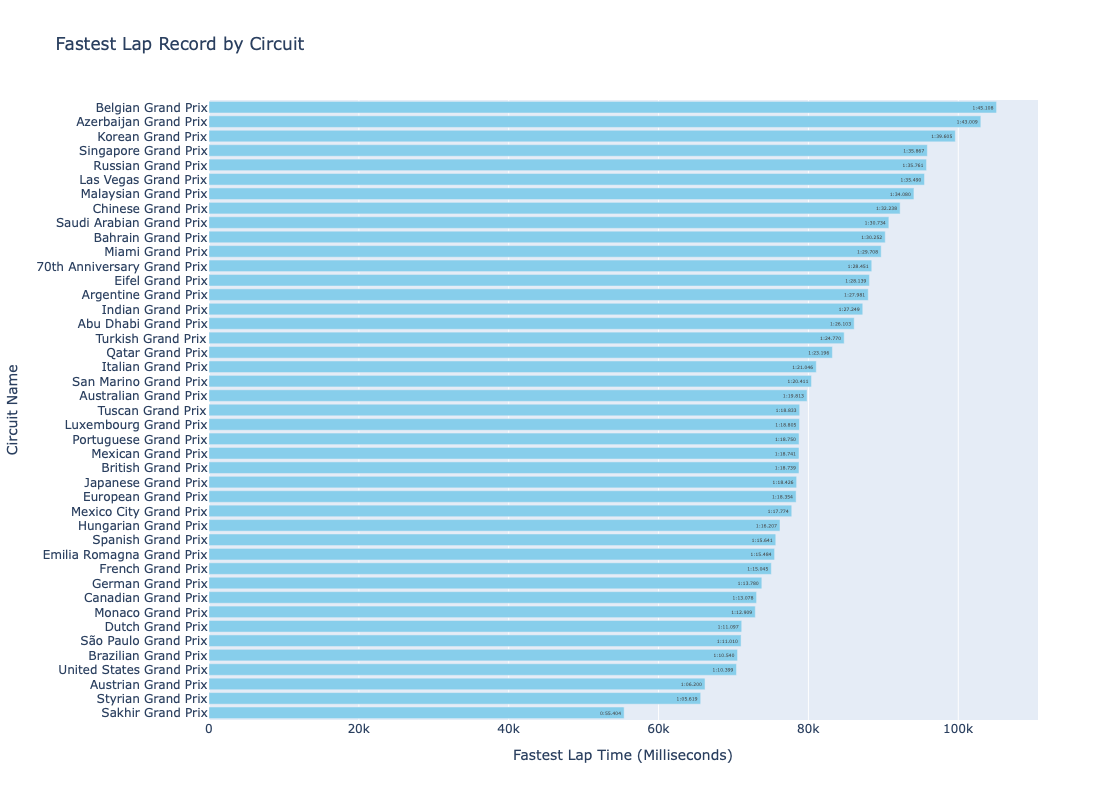

In [76]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=fastest_lap_per_circuit['milliseconds'],
        y=fastest_lap_per_circuit['name'],
        orientation='h',
        text=fastest_lap_per_circuit['Lap Time'],  
        marker=dict(color='skyblue'),
        hovertemplate=(
            '<b>Circuit:</b> %{y}<br>'
            '<b>Driver:</b> %{customdata[0]}<br>'
            '<b>Lap Time:</b> %{text}<extra></extra>'
        ),
        customdata=fastest_lap_per_circuit[['Driver']]  
    ))
fig.update_layout(
    title='Fastest Lap Record by Circuit',
    xaxis_title='Fastest Lap Time (Milliseconds)',
    yaxis_title='Circuit Name',
    yaxis=dict(categoryorder='total ascending'),
    height=800,
    template='plotly')

fig.show()

# 5) Fastest pitstops for the team every year

In [77]:
drivers_df = pd.read_csv('F1_dataset/drivers.csv')
results_df = pd.read_csv('F1_dataset/results.csv')
race_df = pd.read_csv('F1_dataset/races_cleaned_1.csv')
pit_stops_df = pd.read_csv('F1_dataset/pit_stops.csv')
constructors_df = pd.read_csv('F1_dataset/constructors.csv')

# Merge pit stops with results to link drivers to team
pit_stops_with_teams = pit_stops_df.merge(results_df[['raceId','driverId','constructorId']], on=['raceId','driverId'], how='left')

# Merge with races to get the year
pit_stops_with_years = pit_stops_with_teams.merge(race_df[['raceId','year']], on='raceId', how='left')

# Merge with the constructors to get the team names
pit_stops_with_teams = pit_stops_with_years.merge(constructors_df[['constructorId', 'name']], on='constructorId', how='left')
fastest_pitstops = pit_stops_with_teams.loc[pit_stops_with_teams.groupby(['year', 'name'])['milliseconds'].idxmin()]
fastest_pitstops['seconds'] = fastest_pitstops['milliseconds'] / 1000

print("Fastest Pitstops for each team by Year")
print(fastest_pitstops[['year', 'name', 'seconds']])

Fastest Pitstops for each team by Year
       year         name  seconds
992    2011      Ferrari   14.919
419    2011  Force India   14.538
105    2011          HRT   14.160
1047   2011        Lotus   20.652
693    2011      McLaren   13.173
...     ...          ...      ...
10611  2024     Mercedes   17.596
10634  2024   RB F1 Team   17.535
10631  2024     Red Bull   17.222
10635  2024       Sauber   18.938
10627  2024     Williams   17.745

[147 rows x 3 columns]


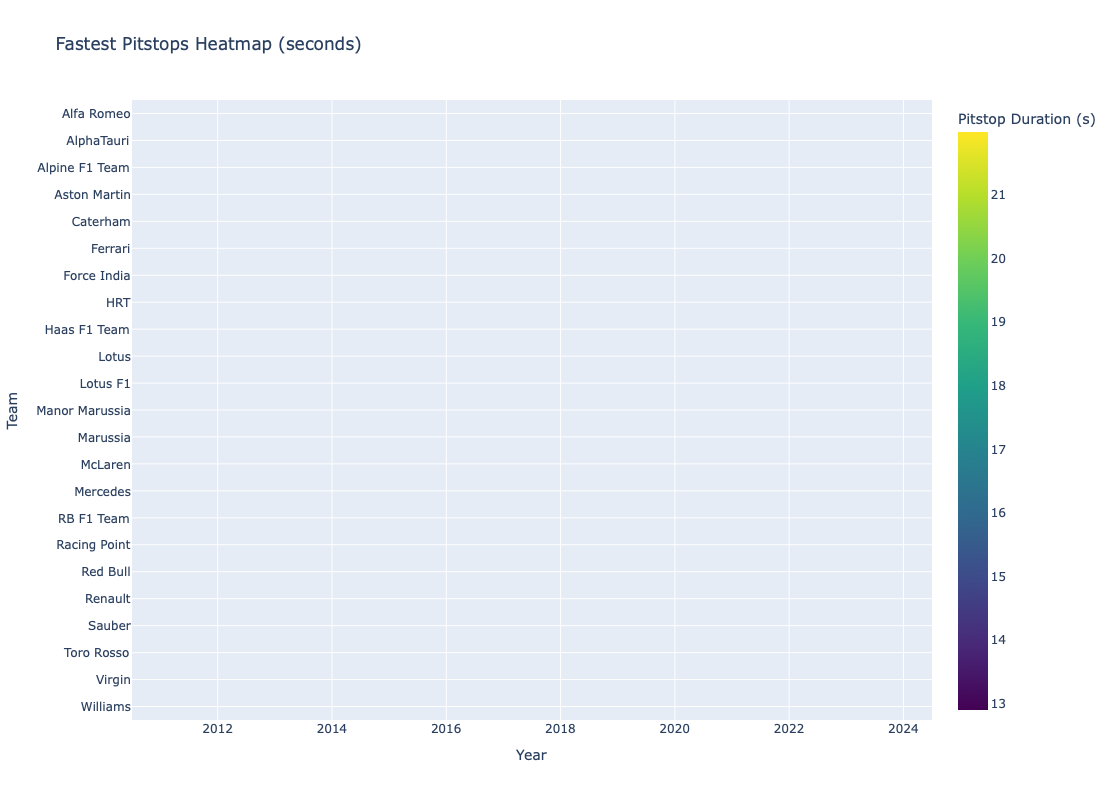

In [78]:
heatmap_data = fastest_pitstops.pivot_table(values = 'seconds',index = 'name',columns = 'year',aggfunc = 'min')

# Plotting the heatmap
fig_heatmap = px.imshow(heatmap_data, color_continuous_scale='Viridis',title='Fastest Pitstops Heatmap (seconds)',
                labels={'x': 'Year', 'y': 'Team', 'color': 'Pitstop Duration (s)'},height=800)
fig.update_layout(xaxis_title='Year', yaxis_title='Team', coloraxis_colorbar=dict(title="Pitstop Duration (s)"), template="plotly")
fig_heatmap.show()

# 6)  Maximum number of points earned by the drivers and the teams

In [79]:
data = pd.read_csv('F1_dataset/results.csv')
data

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [80]:
drivers_df = pd.read_csv('F1_dataset/drivers.csv')
results_df = pd.read_csv('F1_dataset/results.csv')
race_df = pd.read_csv('F1_dataset/races_cleaned_1.csv')
constructors_df = pd.read_csv('F1_dataset/constructors.csv')

# Merging with race with results to get the information of year
results_with_year = results_df.merge(races_df[['raceId', 'year']], on='raceId', how='left')

# Merge with drivers and constructors to get the names
results_with_names = results_with_year.merge(drivers_df[['driverId', 'forename', 'surname']],on='driverId',how='left').merge(
     constructors_df[['constructorId', 'name']],on='constructorId', how='left')

# Aggregating the total points by the drivers and the teams
driver_points = results_with_names.groupby(['driverId','forename', 'surname'])['points'].sum().reset_index()
driver_points = driver_points.sort_values(by='points', ascending=False)

team_points = results_with_names.groupby(['constructorId', 'name'])['points'].sum().reset_index()
team_points = team_points.sort_values(by='points',ascending=False)

# Display top drivers and teams
print("Top Drivers by Total Points:")
print(driver_points.head())

print("\nTop Teams by Total Points:")
print(team_points.head())

Top Drivers by Total Points:
     driverId   forename     surname  points
0           1      Lewis    Hamilton  4713.5
19         20  Sebastian      Vettel  3098.0
828       830        Max  Verstappen  2744.5
3           4   Fernando      Alonso  2304.0
7           8       Kimi   Räikkönen  1873.0

Top Teams by Total Points:
     constructorId      name    points
5                6   Ferrari  10772.27
128            131  Mercedes   7502.64
8                9  Red Bull   7472.00
0                1   McLaren   6687.50
2                3  Williams   3628.00


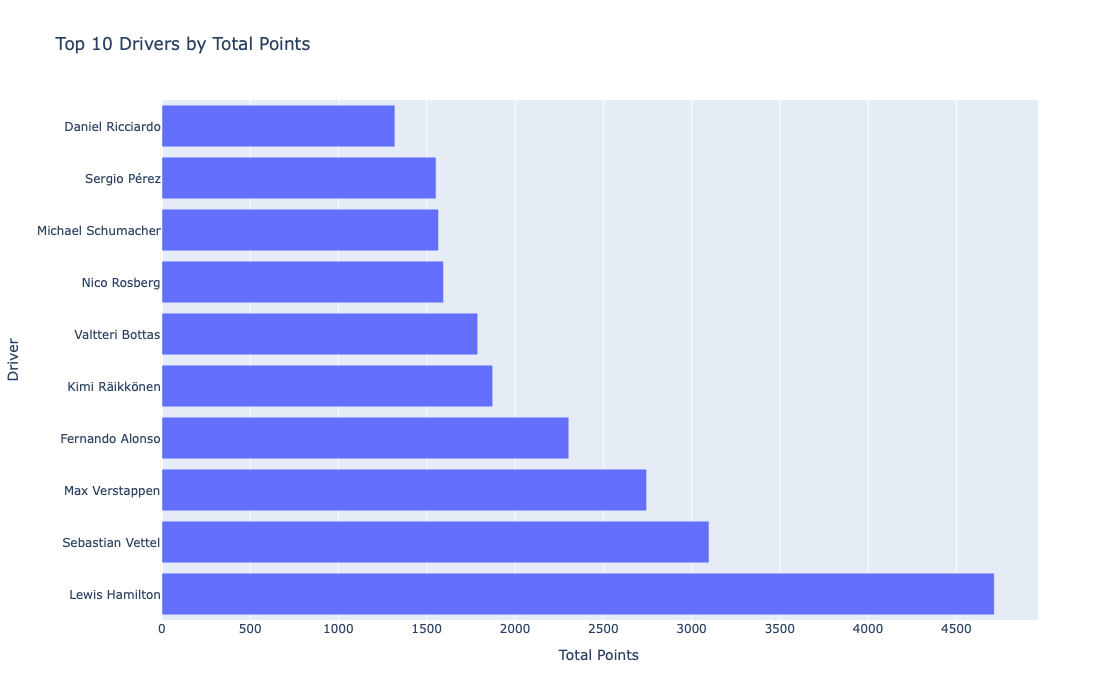

In [81]:
# Visualisation of Top Drivers with Points
fig_driver = px.bar(driver_points.head(10),x='points',y=driver_points.head(10)['forename'] + ' ' + driver_points.head(10)['surname'],
    orientation='h',
    title='Top 10 Drivers by Total Points',
    labels={'points': 'Total Points', 'y': 'Driver Name'},
    height=700)
fig_driver.update_layout(
    xaxis_title="Total Points",
    yaxis_title="Driver",
    template="plotly"
)
fig_driver.show()

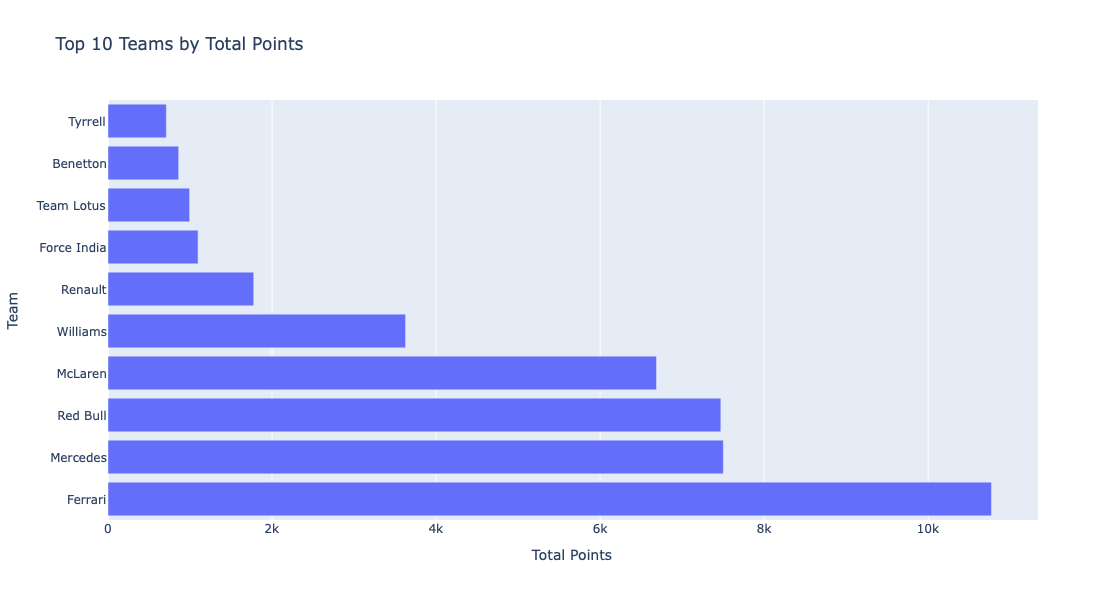

In [82]:
# Visualisation of Top Teams by Points
fig_team = px.bar(
    team_points.head(10),
    x='points',
    y='name',
    orientation='h',
    title='Top 10 Teams by Total Points',
    labels={'points': 'Total Points', 'y': 'Team Name'},
    height=600
)

fig_team.update_layout(
    xaxis_title="Total Points",
    yaxis_title="Team",
    template="plotly"
)
fig_team.show()

# 7) Which track takes the most time and which track takes the shortest time 

In [88]:
lap_times_df = pd.read_csv('F1_dataset/lap_times.csv')
race_df = pd.read_csv('F1_dataset/races_cleaned_1.csv')

# Step 1: Calculate average lap time for each race
average_lap_times = lap_times_df.groupby('raceId')['milliseconds'].mean().reset_index()
average_lap_times['average_lap_seconds'] = average_lap_times['milliseconds'] / 1000  # Convert to seconds

# Merge with races to get circuit names and years
average_lap_times_with_names = average_lap_times.merge(race_df[['raceId', 'name', 'year']],on='raceId',how='left')

# Step 2: Calculate the average lap time for each circuit across all years
average_lap_times_by_circuit = (average_lap_times_with_names.groupby('name')['average_lap_seconds'].mean().reset_index())
average_lap_times_by_circuit = average_lap_times_by_circuit.sort_values(by='average_lap_seconds', ascending=False)

# Convert to MM:SS.xxx format
def format_time(seconds):
    minutes = int(seconds // 60)
    seconds = seconds % 60
    milliseconds = int((seconds - int(seconds)) * 1000)
    return f"{minutes}:{int(seconds):02}.{milliseconds:03}"

average_lap_times_by_circuit['formatted_time'] = average_lap_times_by_circuit['average_lap_seconds'].apply(format_time)

# Find the circuit with the longest average lap time
slowest_circuit = average_lap_times_by_circuit.iloc[0]
fastest_circuit = average_lap_times_by_circuit.iloc[-1]

print("Circuit with the Longest Average Lap Time:")
print(f"Circuit: {slowest_circuit['name']}")
print(f"Average Lap Time: {slowest_circuit['formatted_time']}")

print("\nCircuit with the Shortest Average Lap Time:")
print(f"Circuit: {fastest_circuit['name']}")
print(f"Average Lap Time: {fastest_circuit['formatted_time']}")

Circuit with the Longest Average Lap Time:
Circuit: Tuscan Grand Prix
Average Lap Time: 2:21.405

Circuit with the Shortest Average Lap Time:
Circuit: Sakhir Grand Prix
Average Lap Time: 1:03.150


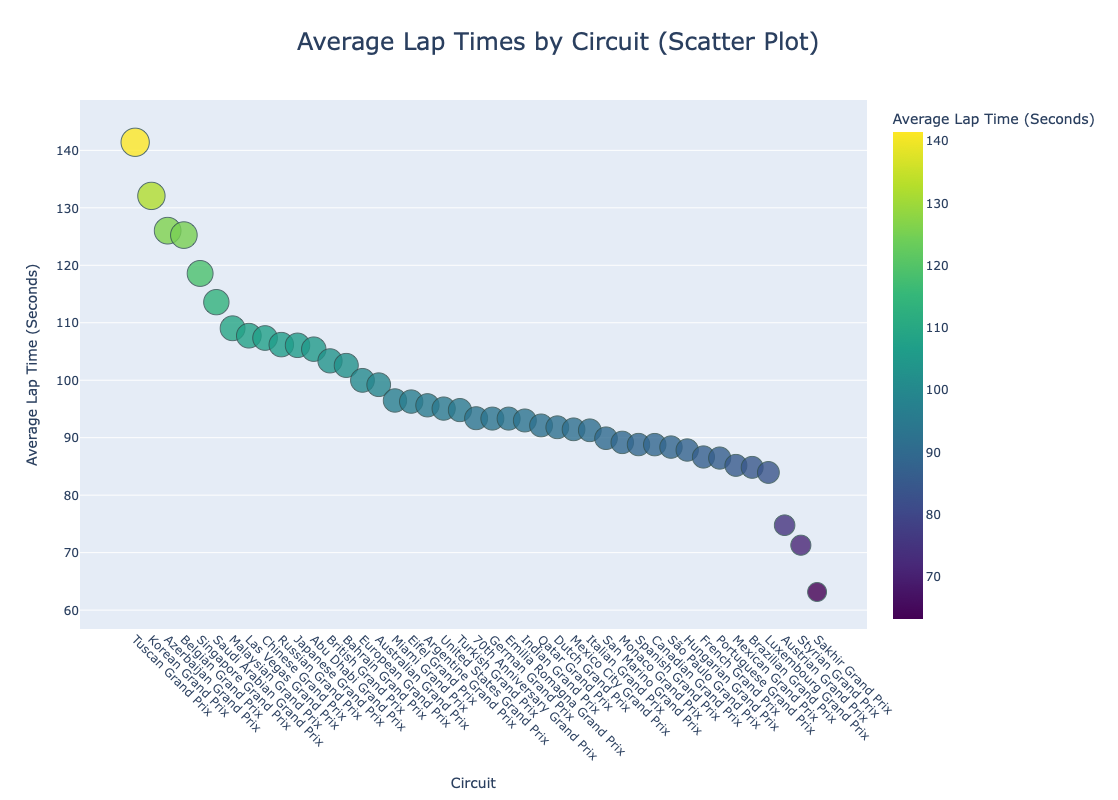

In [89]:
fig_scatter = px.scatter(average_lap_times_by_circuit,x='name',y='average_lap_seconds',size='average_lap_seconds',  
    color='average_lap_seconds', hover_data={'formatted_time': True},title='Average Lap Times by Circuit (Scatter Plot)',
    labels={'average_lap_seconds': 'Average Lap Time (Seconds)','name': 'Circuit'},
    height=800,color_continuous_scale='Viridis')

fig_scatter.update_traces(marker=dict(opacity=0.8,line=dict(width=1, color='DarkSlateGrey')))
fig_scatter.update_layout(xaxis=dict(title="Circuit",showgrid=False,tickangle=45),
    yaxis=dict(title="Average Lap Time (Seconds)", showgrid=True,),
    title=dict(font=dict(size=24),x=0.5),
    template="plotly" )

fig_scatter.show()

# 8)Which drivers could convert pole position to a race win.

In [95]:
results_df = pd.read_csv('F1_dataset/results.csv')
drivers_df = pd.read_csv('F1_dataset/drivers.csv')
qualifying_df = pd.read_csv('F1_dataset/qualifying.csv')

# Merge results with drivers to get the full name driver names and relevent columns
driver_data = results_df.merge(drivers_df, left_on='driverId', right_on='driverId', how='left')
driver_data['full_name'] = driver_data['forename'] + ' ' + driver_data['surname']
driver_data = driver_data[['full_name', 'grid', 'positionOrder']]

# Filter drivers who started on pole position (grid=1)
pole_positions = driver_data[driver_data['grid'] == 1].groupby('full_name')['grid'].count().reset_index(name='grid poles').sort_values('grid poles', ascending=False).reset_index(drop=True)

# Filter drivers who won the races (PositionOrder=1)
race_wins = driver_data[driver_data['positionOrder'] == 1].groupby('full_name')['positionOrder'].count().reset_index(name='race poles').sort_values('race poles', ascending=False).reset_index(drop=True)

# Merge pole position and race wins
conversion_data = pole_positions.merge(race_wins, on='full_name', how='left').fillna(0)
conversion_data['grid poles'] = conversion_data['grid poles'].astype(int)
conversion_data['race poles'] = conversion_data['race poles'].astype(int)

# Calculation of race/grid poles ratio
conversion_data['racexgrid'] = (conversion_data['race poles'] / conversion_data['grid poles']).round(2)

# Filter drivers with more than 10 grid poles and sort by conversion ratio
conversion_data = conversion_data[conversion_data['grid poles'] > 10]
conversion_data = conversion_data.sort_values('racexgrid', ascending=False).reset_index(drop=True)

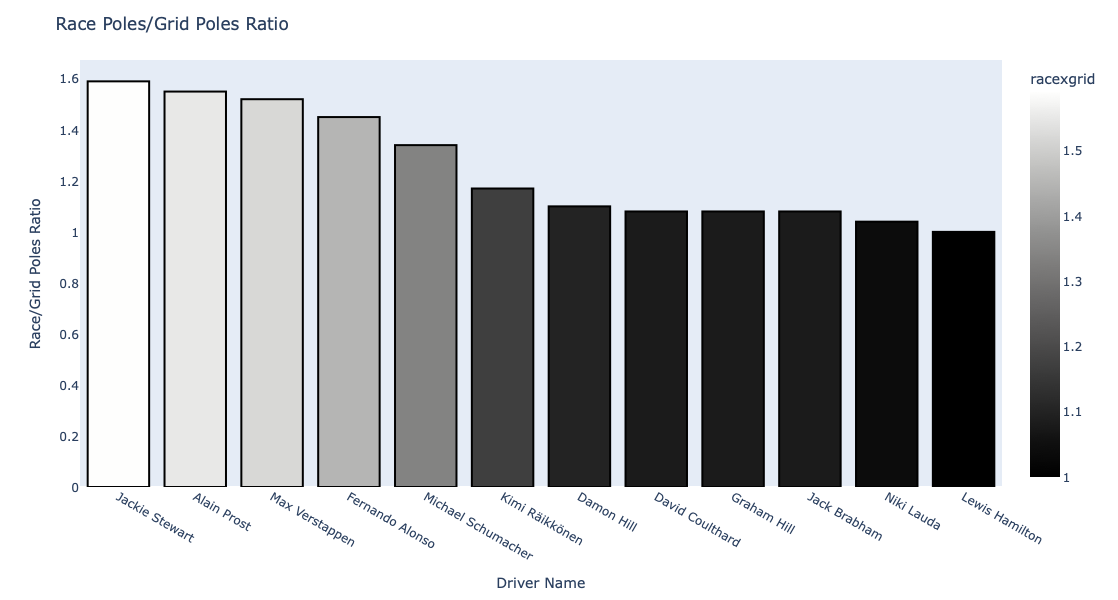

In [96]:
# Visualization of the data
df = conversion_data.head(12) 
fig = px.bar(df,x='full_name',y='racexgrid',hover_data=['race poles', 'grid poles'],color='racexgrid',height=600,color_continuous_scale='gray')
fig.update_layout(title="Race Poles/Grid Poles Ratio",xaxis=dict(title="Driver Name", showgrid=False),yaxis=dict(title="Race/Grid Poles Ratio", showgrid=False),
    template="plotly")
fig.update_traces(textfont_size=20,marker=dict(line=dict(color='#000000', width=2)))
fig.show()